**Hand-written Digit Recognition using a Keras Convolutional Neural Network **

Recognize the hand-written digits using a CNN developed using Keras.

Import the necessary libraries

In [0]:
import tensorflow as tf
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
import keras.backend as K
from keras.utils.np_utils import to_categorical
from keras.models import Sequential


Load the Keras dataset for digit recognition.

In [74]:
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

m = X_train.shape[0] # m is the total number of samples

print("Number of training examples = " + str(m))
print("Number of test examples = " + str(X_test.shape[0]))
print("Shape of training data x_train: " + str(X_train.shape) + " y_train : " + str(Y_train.shape))
print("Shape of test data x_test: " + str(X_test.shape))

Number of training examples = 60000
Number of test examples = 10000
Shape of training data x_train: (60000, 28, 28) y_train : (60000,)
Shape of test data x_test: (10000, 28, 28)


Print a random digit from the training dataset

TypeError: ignored

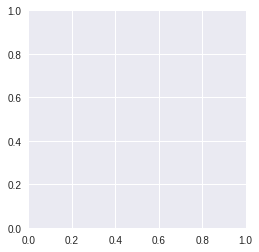

In [82]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

digit_index = 99
some_digit = X_train[digit_index]

plt.imshow(some_digit, cmap = matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()

print("Y Label : " + str(Y_train[digit_index]))

CNN needs the number of channels in the data. Our dataset doesn't have that. Thus, we reshape it and add an extra dimension depending on whether the Keras backend model assumes channels first or last.

We also divide the training data by 255 to normalize it between 0 an 1 since it is a greyscale data.

In [76]:
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]

if K.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


Class labels should be categories. Use Keras to_categorical to convert numbers to one-hot vectors.

In [77]:
num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

print("Y_train shape : " + str(Y_train.shape))

Y_train shape : (60000, 10)


Define a CNN model.

We use 2 convolutional layers followed by a MaxPool layer. Finally, the nodes are flatten and fed to a fully connected network with Softmax activation function. 

In [0]:
def MNISTModel():
  model = Sequential()
  
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  
  return model

Compile the model. Use Adam optimizer with categorical cross entropy loss and calculate the accuracy of the model.

In [0]:
kerasModel = MNISTModel()

kerasModel.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Train the model for 10 epochs using a batch size of 64.

In [80]:

kerasModel.fit(x = X_train , y = Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.1576 - acc: 0.9532
Epoch 2/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0517 - acc: 0.9843
Epoch 3/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0364 - acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0275 - acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0204 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0160 - acc: 0.9950
Epoch 7/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0132 - acc: 0.9957
Epoch 8/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0096 - acc: 0.9968
Epoch 9/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0086 - acc: 0.9973
Epoch 10/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0058 - a

Now calculate the accuracy of the model on the test set.

In [81]:
preds = kerasModel.evaluate(x = X_test, y = Y_test)
print()
print("Loss = " + str(preds[0]))
print("Accuracy on test set = " + str(preds[1]))

10000/10000 [==============================] - 7s 693us/step

Loss = 0.05122261518208461
Accuracy on test set = 0.9877


Let's print the model summary

In [84]:
kerasModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_________________________________________________________________
